## librerias

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns
import scipy.interpolate as interpolate

## Lectura del csv y creacion de un Dataframe

In [2]:
# Leer el archivo CSV y almacenarlo en un DataFrame
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")

## Verificamos que no haya datos duplicados.

In [3]:
print(df_Latam.duplicated().sum())


0


## Iniciamos el trabajo con una exploracion estadistica de las columnas

In [4]:
# Descripcion estadistica de cada columna
for i in df_Latam.columns:
    print (i)
    print (round(df_Latam[i].describe()),2)
    print ("_________________________________________________")

location_key
count     3750
unique       6
top         AR
freq       625
Name: location_key, dtype: object 2
_________________________________________________
date
count           3750
unique           625
top       2021-01-01
freq               6
Name: date, dtype: object 2
_________________________________________________
country_code
count     3750
unique       6
top         AR
freq       625
Name: country_code, dtype: object 2
_________________________________________________
country_name
count          3750
unique            6
top       Argentina
freq            625
Name: country_name, dtype: object 2
_________________________________________________
new_confirmed
count      3750.0
mean      13847.0
std       24212.0
min        -573.0
25%        1511.0
50%        5102.0
75%       14802.0
max      298408.0
Name: new_confirmed, dtype: float64 2
_________________________________________________
new_deceased
count     3750.0
mean       276.0
std        507.0
min          0.0
25%      

## Se observan algunas inconsistencias como el tipo de dato objeto para la fecha o valores minimos negativos que deberian ser positivos. Procedemos a normalizar estos datos para mejorar la calidad de los mismos.

In [5]:
# Se modifica el tipo de dato de fecha
df_Latam["date"] = pd.to_datetime(df_Latam["date"], format="%Y-%m-%d")


In [6]:
# se verifica el cambio
print(df_Latam["date"].dtype)

datetime64[ns]


## Se transforman los valores negativos a positivos de las columnas  new_confirmed, new_deceased y new_recovered

In [7]:
# Convierte los valores negativos a positivos en las columnas
df_Latam['new_confirmed'] = df_Latam['new_confirmed'].abs()
df_Latam['new_deceased'] = df_Latam['new_deceased'].abs()
df_Latam['new_recovered'] = df_Latam['new_recovered'].abs()

## Se realiza una segunda exploracion descriptiva de las columnas pero esta vez solo con algunos calculos estadisticos .

In [8]:
# Obtengo mediante una funcion la mediana, varianza y rango
def calculos_primarios (data):
    for i in data:
        if data[i].dtype == "float64" or data[i].dtype == "int64":
            print (i)
            print ("Mediana: ", data[i].median())
            print ("Moda: ", data[i].mode())
            print ("Varianza: ", data[i].var())
            print ("Maximo: ", data[i].max())
            print ("Minimo: ",data[i].min())
            print ("Rango: ",data[i].max() - data[i].min())
            print ("________________________")#Se imprime esta fila para dividir la infomracion por columnas y facilitar la legibilidad 
calculos_primarios (df_Latam)


new_confirmed
Mediana:  5102.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
Varianza:  586226395.4063854
Maximo:  298408.0
Minimo:  0.0
Rango:  298408.0
________________________
new_deceased
Mediana:  98.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
Varianza:  257255.9058042145
Maximo:  11447.0
Minimo:  0.0
Rango:  11447.0
________________________
cumulative_confirmed
Mediana:  2876984.0
Moda:  0    4597637.0
Name: cumulative_confirmed, dtype: float64
Varianza:  34316623551669.492
Maximo:  26892860.0
Minimo:  727.0
Rango:  26892133.0
________________________
cumulative_deceased
Mediana:  90456.5
Moda:  0    115137.0
Name: cumulative_deceased, dtype: float64
Varianza:  15997076627.013062
Maximo:  490254.0
Minimo:  52.0
Rango:  490202.0
________________________
cumulative_vaccine_doses_administered
Mediana:  47713014.0
Moda:  0    209673612.0
Name: cumulative_vaccine_doses_administered, dtype: float64
Varianza:  8747794082611842.0
Maximo:  347868481.0
Minimo:  18.0
Rango:  

## Se observan falta de datos en las columnas rainfall y cumulative_recovered, en general se necesita explorar graficas para visualizar mas informacion.

In [9]:
# Se selecciona los paises de interes para el desarrollo del estudio

paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brasil']

## Se realizar una matriz de correlacion para ver relacion que existe entre las variables

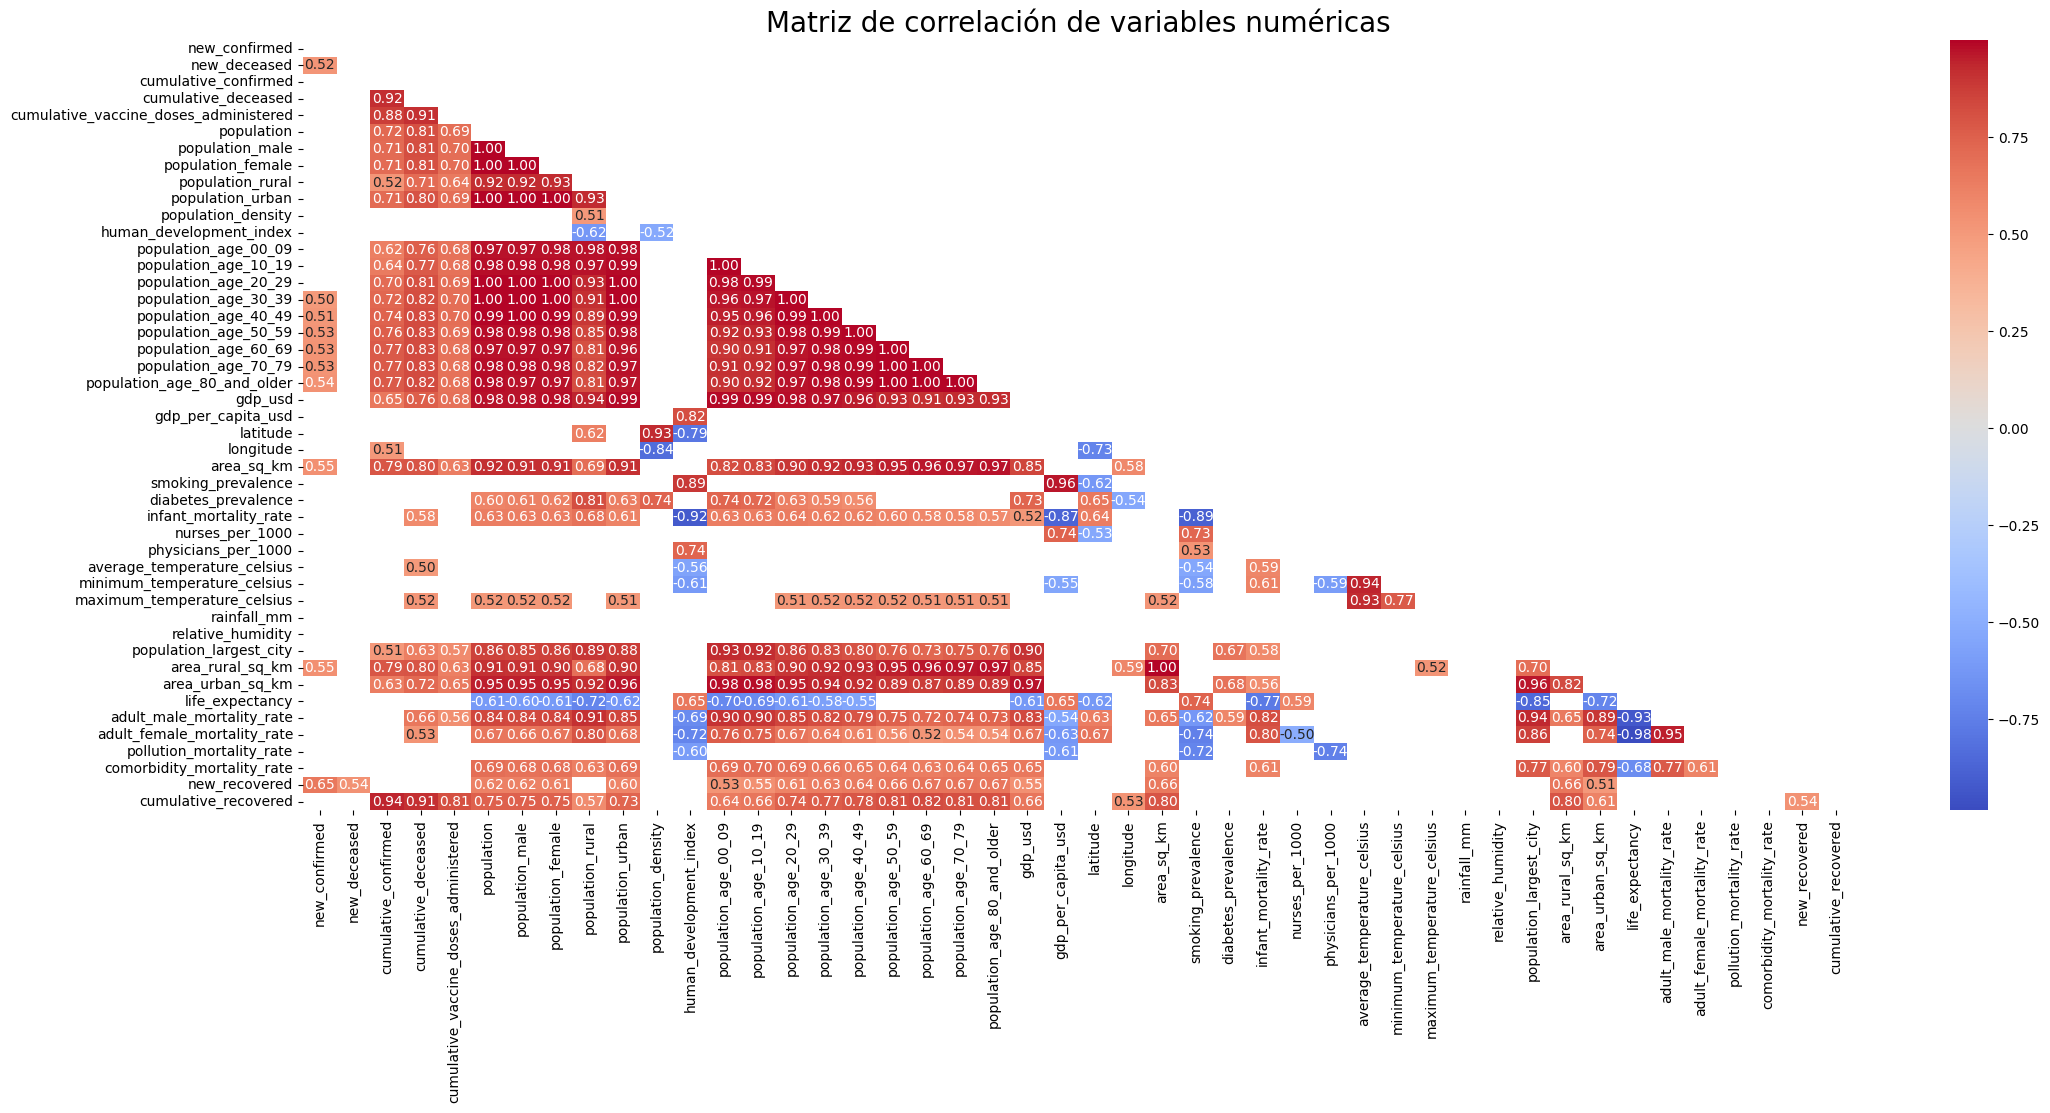

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a correlation matrix of the numeric variables
numeric_columns = df_Latam.select_dtypes(include=['float64','int64']).columns
correlation_matrix = df_Latam[numeric_columns].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Filter correlation values greater than 0.5
correlation_matrix = correlation_matrix[correlation_matrix.abs() > 0.5]

# Create the heatmap
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación de variables numéricas", fontsize=20)
plt.show()

da la matriz de corelacion podemos observar una alta relacion entre todas las columnas.

## En una grafica de barras vemos la cantidad de nuevos casos en cada pais

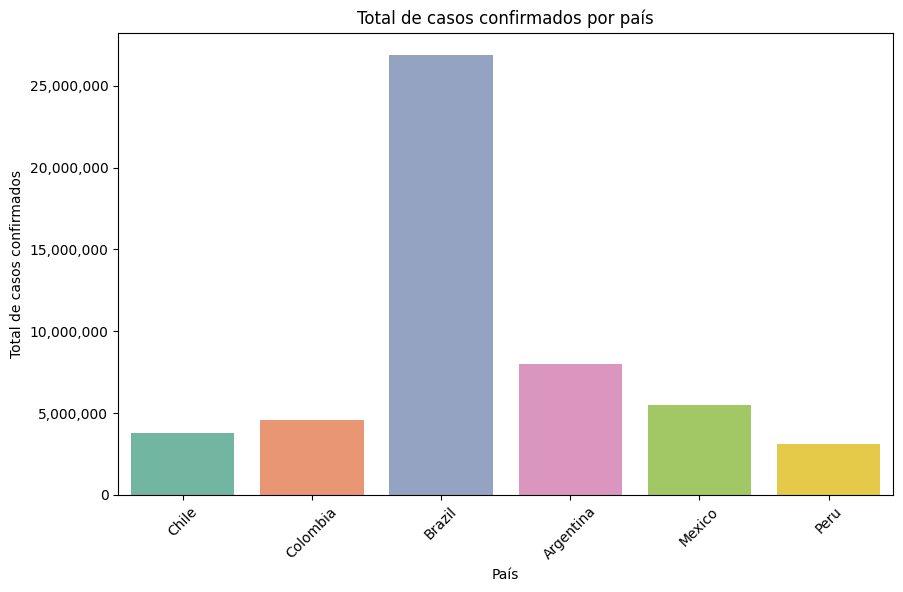

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Cargar el DataFrame desde el archivo CSV proporcionado
df_Latam = pd.read_csv('data_latinoamerica_clean.csv')

# Suponiendo que df_Latam tiene columnas 'country_name', 'date' y 'new_confirmed'
df_Latam['date'] = pd.to_datetime(df_Latam['date'])  # Asegurarse de que la columna de fecha esté en el formato correcto
df_Latam = df_Latam.sort_values(by=['country_name', 'date'])  # Ordenar por país y fecha

# Calcular los casos totales confirmados acumulados
df_Latam['total_confirmed'] = df_Latam.groupby('country_name')['new_confirmed'].cumsum()

# Filtrar el DataFrame para obtener los datos más recientes de cada país
df_latest = df_Latam.sort_values('date').groupby('country_name').tail(1)

# Seleccionar el color
colors = sns.color_palette("Set2", len(df_Latam['country_name'].unique()))

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='country_name', y='total_confirmed', data=df_latest, ax=ax, hue='country_name', dodge=False, palette=colors)
plt.title('Total de casos confirmados por país')
plt.xlabel('País')
plt.ylabel('Total de casos confirmados')
plt.xticks(rotation=45)  # Rotar los nombres de los países si son muchos y se superponen
plt.legend([],[], frameon=False)  # Ocultar la leyenda si no es necesaria

# Formatear el eje y para evitar notación científica
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()


de esta primera observacion, podemos resaltar que en primer lugar el pais mas afectado por la pandemia del COVID-19 fue Brazil, ademas podemos observar que el resto de paises, aunque la taza de confirmados en baja en comparacion con Brazil, no dejan de ser valores muy alarmantes para cada nacion.

## se verifican los valores  para buscar valores duplicados 

In [12]:
# Obtener todas las filas duplicadas (incluyendo la primera ocurrencia)
all_duplicates = df_Latam[df_Latam.duplicated(keep=False)]

# Agrupar por todas las columnas y contar las ocurrencias
duplicates_summary = all_duplicates.groupby(list(df_Latam.columns)).size().reset_index(name='count')

# Filtrar para mostrar solo las filas que se duplican más de una vez
duplicates_summary = duplicates_summary[duplicates_summary['count'] > 1]

print(duplicates_summary)


Empty DataFrame
Columns: [location_key, date, country_code, country_name, new_confirmed, new_deceased, cumulative_confirmed, cumulative_deceased, cumulative_vaccine_doses_administered, population, population_male, population_female, population_rural, population_urban, population_density, human_development_index, population_age_00_09, population_age_10_19, population_age_20_29, population_age_30_39, population_age_40_49, population_age_50_59, population_age_60_69, population_age_70_79, population_age_80_and_older, gdp_usd, gdp_per_capita_usd, latitude, longitude, area_sq_km, smoking_prevalence, diabetes_prevalence, infant_mortality_rate, nurses_per_1000, physicians_per_1000, average_temperature_celsius, minimum_temperature_celsius, maximum_temperature_celsius, rainfall_mm, relative_humidity, population_largest_city, area_rural_sq_km, area_urban_sq_km, life_expectancy, adult_male_mortality_rate, adult_female_mortality_rate, pollution_mortality_rate, comorbidity_mortality_rate, new_recove

# Analisis de como afecta la temperatura ambiente al aumento de casos de COVID-19

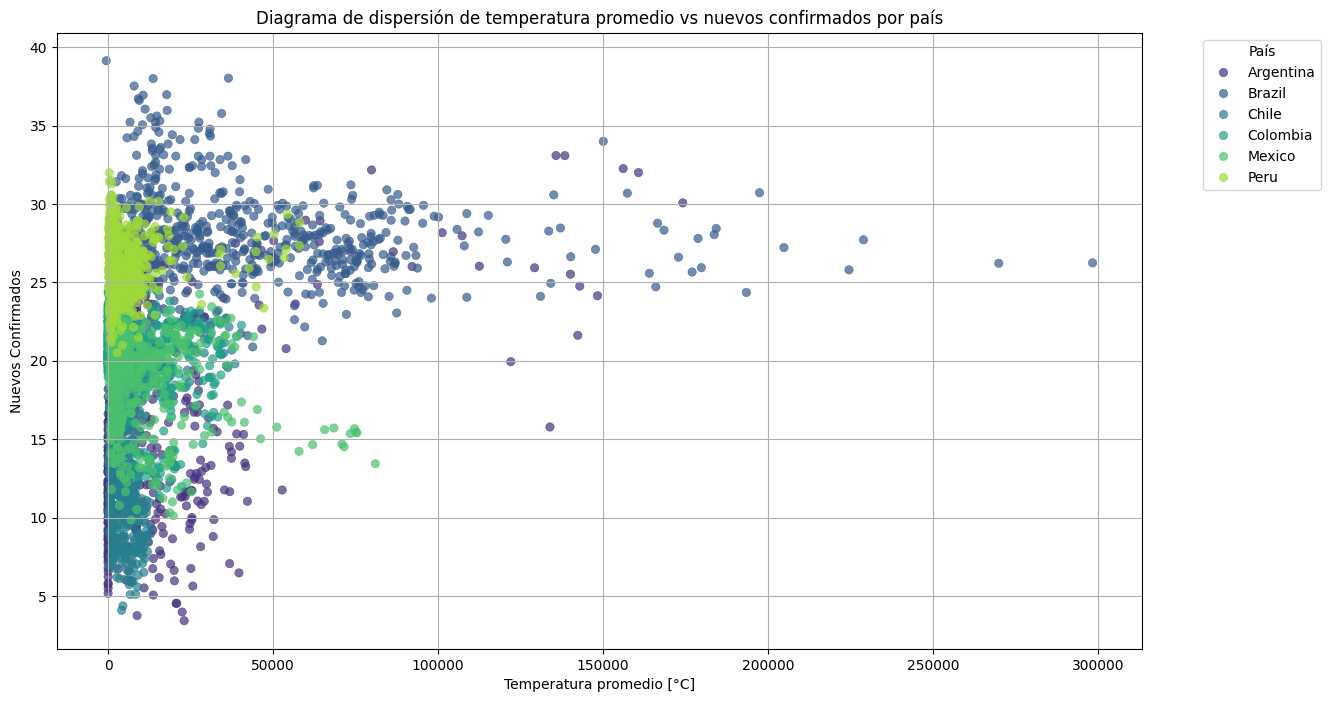

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame desde el CSV
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")


# Asegurarse de que las columnas sean del tipo correcto
df_Latam['average_temperature_celsius'] = pd.to_numeric(df_Latam['average_temperature_celsius'], errors='coerce')
df_Latam['new_confirmed'] = pd.to_numeric(df_Latam['new_confirmed'], errors='coerce')

# Crear el diagrama de dispersión
plt.figure(figsize=(14, 8))
sns.scatterplot(y='average_temperature_celsius', x='new_confirmed', data=df_Latam, hue='country_name', palette='viridis', alpha=0.7, edgecolor=None)

plt.title('Diagrama de dispersión de temperatura promedio vs nuevos confirmados por país')
plt.xlabel('Temperatura promedio [°C]')
plt.ylabel('Nuevos Confirmados')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# Analisis de como afecta la temperatura ambiente al aumento de deceso por COVID-19

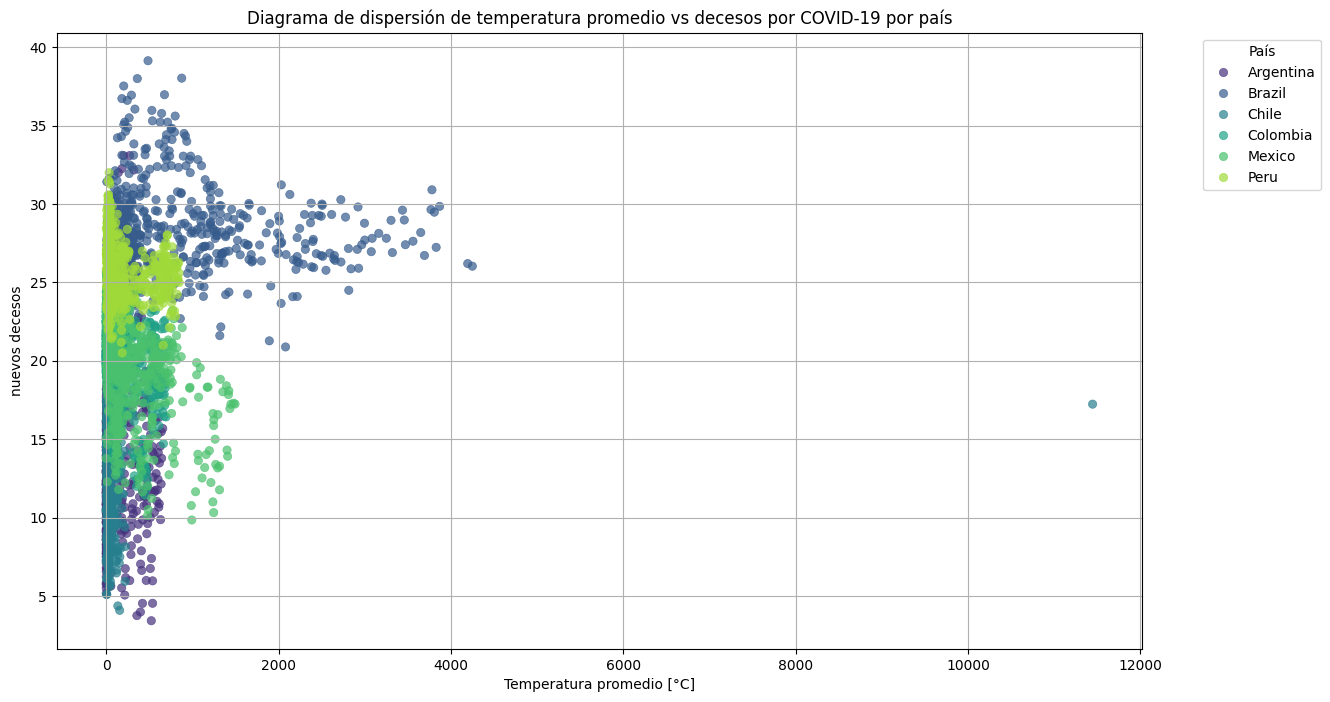

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame desde el CSV
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")


# Asegurarse de que las columnas sean del tipo correcto
df_Latam['average_temperature_celsius'] = pd.to_numeric(df_Latam['average_temperature_celsius'], errors='coerce')
df_Latam['new_confirmed'] = pd.to_numeric(df_Latam['new_confirmed'], errors='coerce')

# Crear el diagrama de dispersión
plt.figure(figsize=(14, 8))
sns.scatterplot(y='average_temperature_celsius', x='new_deceased', data=df_Latam, hue='country_name', palette='viridis', alpha=0.7, edgecolor=None)

plt.title('Diagrama de dispersión de temperatura promedio vs decesos por COVID-19 por país')
plt.xlabel('Temperatura promedio [°C]')
plt.ylabel('nuevos decesos')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# Graficar de vacunas administradas

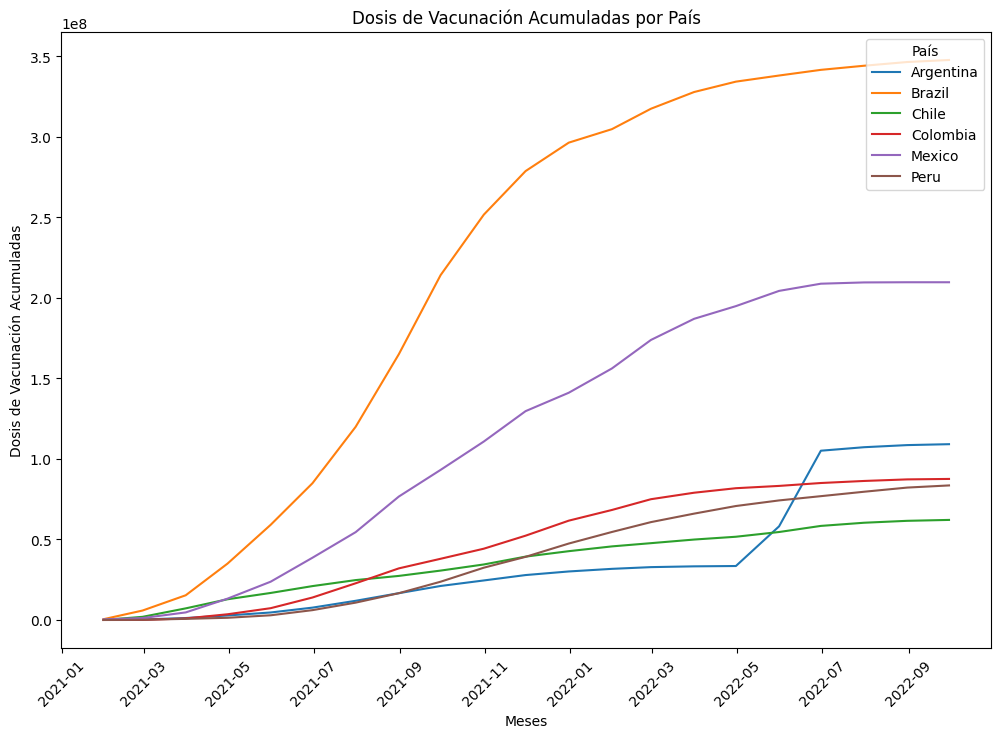

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame desde el CSV
df_Latam = pd.read_csv("data_latinoamerica_clean.csv")

# Asegurarse de que la columna 'date' esté en el formato de fecha
df_Latam['date'] = pd.to_datetime(df_Latam['date'])

# Definir la lista de países de interés
paises = ['Argentina','Chile','Colombia','Mexico','Peru','Brazil']  # Ejemplo de lista de países

# Filtrar los datos para los países seleccionados
data_paises = df_Latam[df_Latam['country_name'].isin(paises)]

# Establecer la columna 'date' como índice para poder usar Grouper
data_paises.set_index('date', inplace=True)

# Calcular el promedio mensual de las dosis acumuladas para cada país
promedio_dosis = data_paises.groupby(['country_name', pd.Grouper(freq='ME')])['cumulative_vaccine_doses_administered'].mean().reset_index()

# Crear el gráfico de líneas con datos no interpolados
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='cumulative_vaccine_doses_administered', hue='country_name', data=promedio_dosis, errorbar=None)
plt.title('Dosis de Vacunación Acumuladas por País')
plt.xlabel('Fecha')
plt.ylabel('Dosis de Vacunación Acumuladas')
plt.xticks(rotation=45)
plt.legend(title='País', loc='upper right')
plt.show()


# Evolución de Casos Nuevos de COVID-19 en América Latina

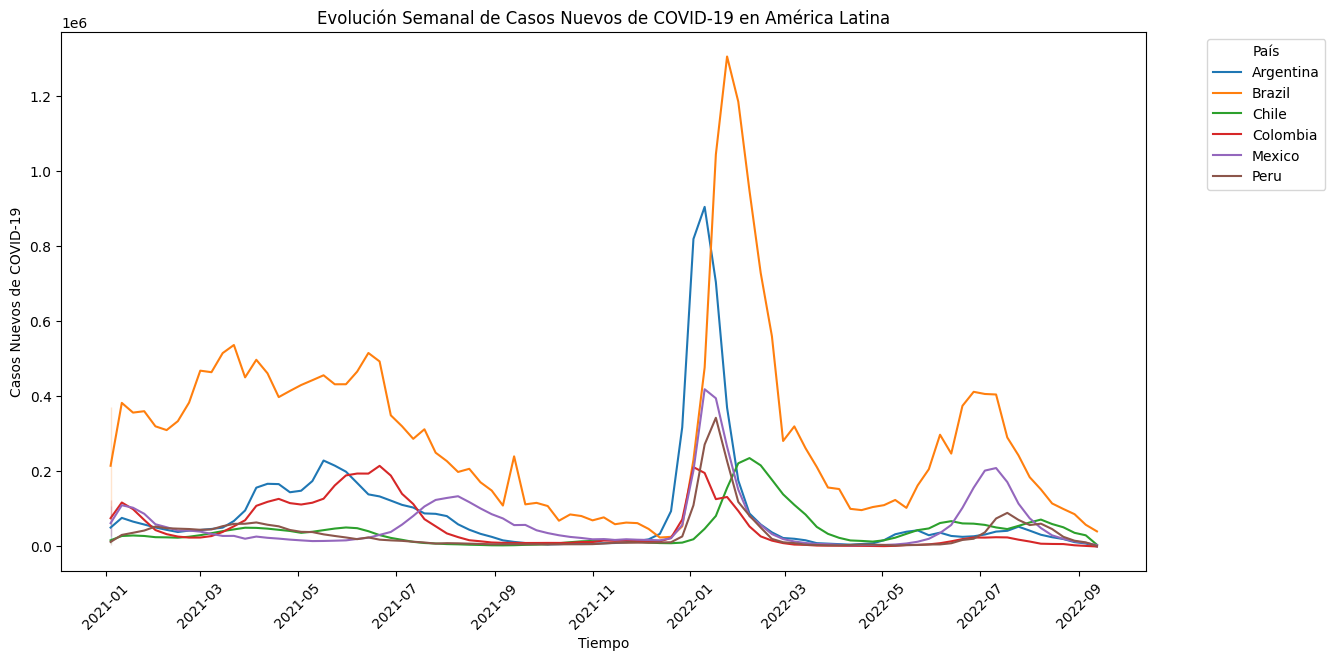

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df_Latam ya está cargado desde un archivo CSV
# Ejemplo: df_Latam = pd.read_csv('tu_archivo.csv', parse_dates=['date'])

# Asegúrate de que la columna 'date' sea de tipo datetime
df_Latam['date'] = pd.to_datetime(df_Latam['date'])

# Calcular la semana y el año a partir de la columna 'date'
df_Latam['week'] = df_Latam['date'].dt.isocalendar().week
df_Latam['year'] = df_Latam['date'].dt.isocalendar().year

# Calcular la suma semanal de casos nuevos de COVID-19 por país
weekly_cases = df_Latam.groupby(['country_name', 'year', 'week'])['new_confirmed'].sum().reset_index()

# Crear una columna de tiempo combinando el año y la semana para la visualización
weekly_cases['time'] = weekly_cases['year'].astype(str) + '-W' + weekly_cases['week'].astype(str)

# Convertir la columna de tiempo a un formato datetime adecuado para el eje X
weekly_cases['time'] = pd.to_datetime(weekly_cases['time'] + '-1', format='%Y-W%W-%w')

# Crear el gráfico de líneas para la evolución semanal
plt.figure(figsize=(14, 7))
sns.lineplot(x='time', y='new_confirmed', hue='country_name', data=weekly_cases)
plt.xlabel('Tiempo')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución de Casos Nuevos de COVID-19 en América Latina')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [22]:
print(df_Latam['cumulative_vaccine_doses_administered'].describe())


count    3.750000e+03
mean     8.069876e+07
std      9.352964e+07
min      1.800000e+01
25%      1.599228e+07
50%      4.771301e+07
75%      9.408868e+07
max      3.478685e+08
Name: cumulative_vaccine_doses_administered, dtype: float64


In [23]:
print(df_Latam['cumulative_vaccine_doses_administered'].isna().any())


False


intantamos con los decesos

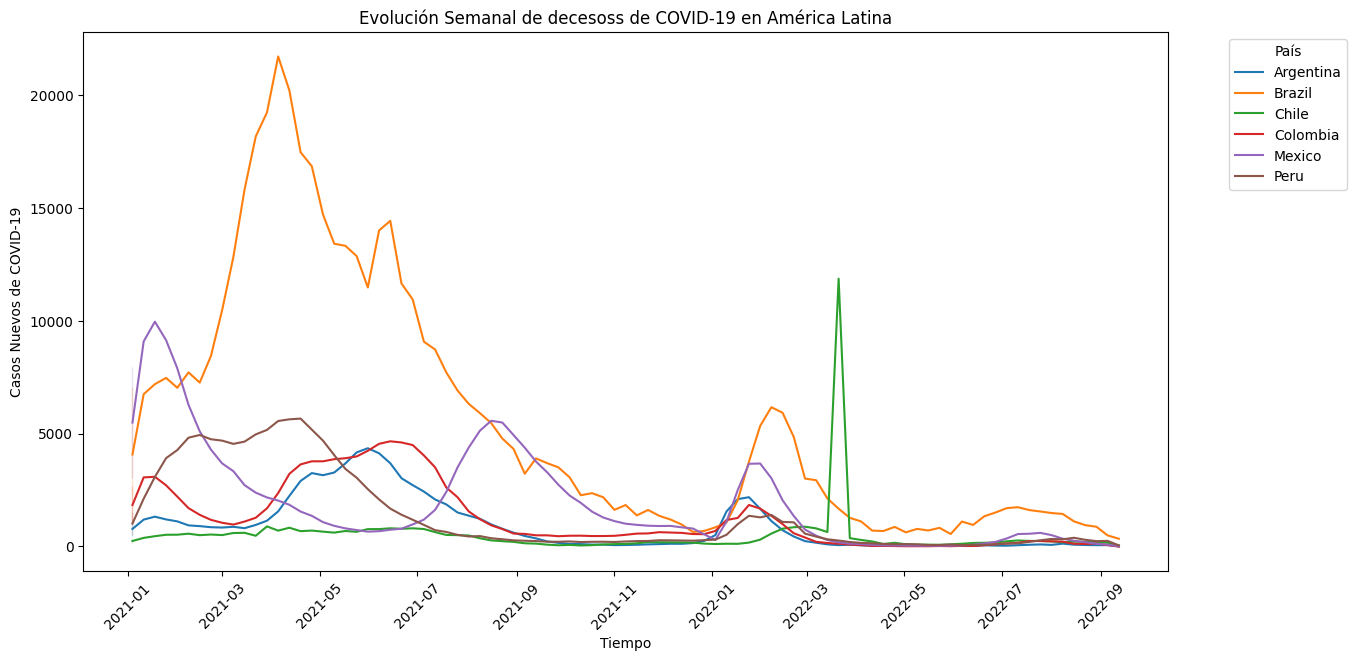

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna 'date' sea de tipo datetime
df_Latam['date'] = pd.to_datetime(df_Latam['date'])

# Calcular la semana y el año a partir de la columna 'date'
df_Latam['week'] = df_Latam['date'].dt.isocalendar().week
df_Latam['year'] = df_Latam['date'].dt.isocalendar().year

# Calcular la suma semanal de casos nuevos de COVID-19 por país
weekly_cases = df_Latam.groupby(['country_name', 'year', 'week'])['new_deceased'].sum().reset_index()

# Crear una columna de tiempo combinando el año y la semana para la visualización
weekly_cases['time'] = weekly_cases['year'].astype(str) + '-W' + weekly_cases['week'].astype(str)

# Convertir la columna de tiempo a un formato datetime adecuado para el eje X
weekly_cases['time'] = pd.to_datetime(weekly_cases['time'] + '-1', format='%Y-W%W-%w')

# Crear el gráfico de líneas para la evolución semanal
plt.figure(figsize=(14, 7))
sns.lineplot(x='time', y='new_deceased', hue='country_name', data=weekly_cases)
plt.xlabel('Tiempo')
plt.ylabel('Decesos por COVID-19')
plt.title('Evolución de decesoss de COVID-19 en América Latina')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
